In [1]:
from ReadStats import Statistics, Pdfs 
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from matplotlib import rc
#from scipy.interpolate import interp1d


rc('text', usetex=True)
rc('text.latex', preamble=r"\usepackage{fourier}")
rc('font', family='serif')
rc('font', size=24)
rc('axes', linewidth=1.5)
rc('axes', labelsize=24)

opath = '/Volumes/Seagate/SCRATCH/plots/3D/Re025/Rapids/'
colourmap_path = '/home/mpim/m300551/local/ScientificColourMaps5/'

path = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/'

In [2]:
def find_nearest_bisection(array,value):
    """
    Returns an index j such that ``value`` is between array[j]
    and array[j+1]. ``array`` must be monotonic increasing. j=-1 or j=len(array) is returned
    to indicate that ``value`` is out of range below and above respectively.
    """

    n = len(array)
    if (value < array[0]):
        return -1
    elif (value > array[n-1]):
        return n
    jl = 0                      # Initialize lower
    ju = n-1                    # and upper limits.
    while (ju-jl > 1):          # If we are not yet done,
        jm=(ju+jl) >> 1         # compute a midpoint with a bitshift
        if (value >= array[jm]):
            jl=jm               # and replace either the lower limit
        else:
            ju=jm               # or the upper limit, as appropriate.
                                # Repeat until the test condition is satisfied.
    if (value == array[0]):     # edge cases at bottom
        return 0
    elif (value == array[n-1]): # and top
        return n-1
    else:
        return jl

def running_average(x,f,dx,m):
    """
    Calculate running average over dx at equally spaced m points.
    Assuming the independent variable x is non-decreasing.
    """

    # Defining the final independent variable
    yl = x[0]  +0.5 *dx
    yr = x[-1] -0.5 *dx
    y = np.linspace(yl,yr,m)

    avg = np.empty(m)
    std = np.empty(m)

    for j in range(m):
        yl = y[j] -0.5 *dx
        jl = find_nearest_bisection(x,yl) +1
        yr = y[j] +0.5 *dx
        jr = find_nearest_bisection(x,yr)

        # avg[j] = np.trapz(  f[jl:jr+1]            ,x[jl:jr+1]) /( x[jr]-x[jl] )
        if jl > 0:
            al = ( x[jl] -yl )/( x[jl] -x[jl-1] )
            al = 0.5 *( x[jl] -yl ) *( al *f[jl-1] +(2.0-al)*f[jl] )
        else:
            al = 0.0

        if jr < np.size(x)-1:
            ar = ( yr -x[jr] )/( x[jr+1] -x[jr] )
            ar = 0.5 *( yr -x[jr] ) *( ar *f[jr+1] +(2.0-ar)*f[jr] )
        else:
            ar = 0.0

        avg[j] = ( np.trapz(  f[jl:jr+1]            ,x[jl:jr+1]) +al +ar )/dx

    return y, avg

In [3]:
# Constants

nu = 1./15000.
B0 = 0.005
N = np.sqrt(3)
L0 = (B0/N**3)**0.5
ceps = 0.1

##########################################################################
# Stats

S0 = Statistics(path+'2560x512x2560/stats/pdftimes/avg17000-21000.nc')
S05 = Statistics(path+'1280x512x1280-S05/stats/pdftimes/avg22000-28000.nc')
S10 = Statistics(path+'1280x512x1280-S10/stats/pdftimes/avg24000-32000.nc')
S15 = Statistics(path+'1536x576x1536-S15/stats/pdftimes/avg27000-35000.nc')
S20 = Statistics(path+'S20-1536x576x1536/stats/pdftimes/avg28000-35000.nc')
S25 = Statistics(path+'2560x896x2560-S25/stats/pdftimes/avg46000-57000.nc')

In [4]:
# Pdf

S0_vortpdf = Pdfs([path+'2560x512x2560/stats/pdfs/pdf17000.LnEnstrophyW_iW_i',path+'2560x512x2560/stats/pdfs/pdf19000.LnEnstrophyW_iW_i',path+'2560x512x2560/stats/pdfs/pdf21000.LnEnstrophyW_iW_i'],path+'2560x512x2560/y.dat')
S05_vortpdf = Pdfs([path+'1280x512x1280-S05/stats/pdfs/pdf22000.LnEnstrophyW_iW_i',path+'1280x512x1280-S05/stats/pdfs/pdf25000.LnEnstrophyW_iW_i',path+'1280x512x1280-S05/stats/pdfs/pdf28000.LnEnstrophyW_iW_i'],path+'1280x512x1280-S05/y.dat')
S10_vortpdf =  Pdfs([path+'1280x512x1280-S10/stats/pdfs/pdf24000.LnEnstrophyW_iW_i',path+'1280x512x1280-S10/stats/pdfs/pdf28000.LnEnstrophyW_iW_i',path+'1280x512x1280-S10/stats/pdfs/pdf32000.LnEnstrophyW_iW_i'],path+'1280x512x1280-S10/y.dat')
S15_vortpdf = Pdfs([path+'1536x576x1536-S15/stats/pdfs/pdf27000.LnEnstrophyW_iW_i',path+'1536x576x1536-S15/stats/pdfs/pdf31000.LnEnstrophyW_iW_i',path+'1536x576x1536-S15/stats/pdfs/pdf35000.LnEnstrophyW_iW_i'],path+'1536x576x1536-S15/y.dat')
S20_vortpdf = Pdfs([path+'S20-1536x576x1536/stats/pdfs/pdf28000.LnEnstrophyW_iW_i',path+'S20-1536x576x1536/stats/pdfs/pdf31000.LnEnstrophyW_iW_i',path+'S20-1536x576x1536/stats/pdfs/pdf35000.LnEnstrophyW_iW_i'],path+'S20-1536x576x1536/y.dat')
S25_vortpdf = Pdfs([path+'2560x896x2560-S25/stats/pdfs/pdf46000.LnEnstrophyW_iW_i',path+'2560x896x2560-S25/stats/pdfs/pdf51000.LnEnstrophyW_iW_i',path+'2560x896x2560-S25/stats/pdfs/pdf57000.LnEnstrophyW_iW_i'],path+'2560x896x2560-S25/y.dat')

# Create grid on which to interpolate pdfs

S0_vortpdf_interp_data = Pdfs([path+'2560x512x2560/stats/pdfs/pdf45000.LnEnstrophyW_iW_i'],path+'2560x512x2560/y.dat')
S05_vortpdf_interp_data = Pdfs([path+'1280x512x1280-S05/stats/pdfs/pdf57000.LnEnstrophyW_iW_i'],path+'1280x512x1280-S05/y.dat')
S10_vortpdf_interp_data = Pdfs([path+'1280x512x1280-S10/stats/pdfs/pdf84000.LnEnstrophyW_iW_i'],path+'1280x512x1280-S10/y.dat')
S15_vortpdf_interp_data = Pdfs([path+'1536x576x1536-S15/stats/pdfs/pdf76000.LnEnstrophyW_iW_i'],path+'1536x576x1536-S15/y.dat')
S20_vortpdf_interp_data = Pdfs([path+'S20-1536x576x2304/stats/pdfs/pdf75000.LnEnstrophyW_iW_i'],path+'S20-1536x576x1536/y.dat')
S25_vortpdf_interp_data = Pdfs([path+'2560x896x2560-S25/stats/pdfs/pdf110000.LnEnstrophyW_iW_i'],path+'2560x896x2560-S25/y.dat')

# Interpolate pdfs in x-direction

S0_vortpdf_interp = np.zeros((3,S0.y_len,S0_vortpdf.nb))
for n in range(3):
    for j in range(S0.y_len):
        S0_vortpdf_interp[n,j,:] = np.interp(S0_vortpdf_interp_data.xy[0,0,j,:],S0_vortpdf.xy[0,n,j,:],S0_vortpdf.pdf[n,j,:-2])

S05_vortpdf_interp = np.zeros((3,S05.y_len,S05_vortpdf.nb))
for n in range(3):
    for j in range(S05.y_len):
        S05_vortpdf_interp[n,j,:] = np.interp(S05_vortpdf_interp_data.xy[0,0,j,:],S05_vortpdf.xy[0,n,j,:],S05_vortpdf.pdf[n,j,:-2])

S10_vortpdf_interp = np.zeros((3,S10.y_len,S10_vortpdf.nb))
for n in range(3):
    for j in range(S10.y_len):
        S10_vortpdf_interp[n,j,:] = np.interp(S10_vortpdf_interp_data.xy[0,0,j,:],S10_vortpdf.xy[0,n,j,:],S10_vortpdf.pdf[n,j,:-2])

S15_vortpdf_interp = np.zeros((3,S15.y_len,S15_vortpdf.nb))
for n in range(3):
    for j in range(S15.y_len):
        S15_vortpdf_interp[n,j,:] = np.interp(S15_vortpdf_interp_data.xy[0,0,j,:],S15_vortpdf.xy[0,n,j,:],S15_vortpdf.pdf[n,j,:-2])

S20_vortpdf_interp = np.zeros((3,S20.y_len,S20_vortpdf.nb))
for n in range(3):
    for j in range(S20.y_len):
        S20_vortpdf_interp[n,j,:] = np.interp(S20_vortpdf_interp_data.xy[0,0,j,:],S20_vortpdf.xy[0,n,j,:],S20_vortpdf.pdf[n,j,:-2])

S25_vortpdf_interp = np.zeros((3,S25.y_len,S25_vortpdf.nb))
for n in range(3):
    for j in range(S25.y_len):
        S25_vortpdf_interp[n,j,:] = np.interp(S25_vortpdf_interp_data.xy[0,0,j,:],S25_vortpdf.xy[0,n,j,:],S25_vortpdf.pdf[n,j,:-2])
        
# Mean of pdfs

S0_vortpdf_interp_runmean = np.mean(S0_vortpdf_interp,axis=0)
S05_vortpdf_interp_runmean = np.mean(S05_vortpdf_interp,axis=0)
S10_vortpdf_interp_runmean = np.mean(S10_vortpdf_interp,axis=0)
S15_vortpdf_interp_runmean = np.mean(S15_vortpdf_interp,axis=0)
S20_vortpdf_interp_runmean = np.mean(S20_vortpdf_interp,axis=0)
S25_vortpdf_interp_runmean = np.mean(S25_vortpdf_interp,axis=0)

# Find where pdf has a maximum at each height
    
maxvort_S0 = np.zeros(S0.y_len)
maxprob_vort_S0 = np.zeros(S0.y_len)
for i in range(0,S0.y_len):
    maxvort_S0[i] = S0_vortpdf_interp_data.xy[0,0,i,np.argmax(S0_vortpdf_interp_runmean[i,:])]
    maxprob_vort_S0[i] = np.max(S0_vortpdf_interp_runmean[i,:])
maxvort_S0 = np.log10(np.exp(maxvort_S0)/(ceps*B0/nu))

maxvort_S05 = np.zeros(S05.y_len)
maxprob_vort_S05 = np.zeros(S05.y_len)
for i in range(0,S05.y_len):
    maxvort_S05[i] = S05_vortpdf_interp_data.xy[0,0,i,np.argmax(S05_vortpdf_interp_runmean[i,:])]
    maxprob_vort_S05[i] = np.max(S05_vortpdf_interp_runmean[i,:])
maxvort_S05 = np.log10(np.exp(maxvort_S05)/(ceps*B0/nu))

maxvort_S10 = np.zeros(S10.y_len)
maxprob_vort_S10 = np.zeros(S10.y_len)
for i in range(0,S10.y_len):
    maxvort_S10[i] = S10_vortpdf_interp_data.xy[0,0,i,np.argmax(S10_vortpdf_interp_runmean[i,:])]
    maxprob_vort_S10[i] = np.max(S10_vortpdf_interp_runmean[i,:])
maxvort_S10 = np.log10(np.exp(maxvort_S10)/(ceps*B0/nu))

maxvort_S15 = np.zeros(S15.y_len)
maxprob_vort_S15 = np.zeros(S15.y_len)
for i in range(0,S15.y_len):
    maxvort_S15[i] = S15_vortpdf_interp_data.xy[0,0,i,np.argmax(S15_vortpdf_interp_runmean[i,:])]
    maxprob_vort_S15[i] = np.max(S15_vortpdf_interp_runmean[i,:])
maxvort_S15 = np.log10(np.exp(maxvort_S15)/(ceps*B0/nu))

maxvort_S20 = np.zeros(S20.y_len)
maxprob_vort_S20 = np.zeros(S20.y_len)
for i in range(0,S20.y_len):
    maxvort_S20[i] = S20_vortpdf_interp_data.xy[0,0,i,np.argmax(S20_vortpdf_interp_runmean[i,:])]
    maxprob_vort_S20[i] = np.max(S20_vortpdf_interp_runmean[i,:])
maxvort_S20 = np.log10(np.exp(maxvort_S20)/(ceps*B0/nu))

maxvort_S25 = np.zeros(S25.y_len)
maxprob_vort_S25 = np.zeros(S25.y_len)
for i in range(0,S25.y_len):
    maxvort_S25[i] = S25_vortpdf_interp_data.xy[0,0,i,np.argmax(S25_vortpdf_interp_runmean[i,:])]
    maxprob_vort_S25[i] = np.max(S25_vortpdf_interp_runmean[i,:])
maxvort_S25 = np.log10(np.exp(maxvort_S25)/(ceps*B0/nu))

Files with 64 bins and 512 levels.
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2560x512x2560/stats/pdfs/pdf17000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2560x512x2560/stats/pdfs/pdf19000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2560x512x2560/stats/pdfs/pdf21000.LnEnstrophyW_iW_i ...
Files with 64 bins and 512 levels.
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/stats/pdfs/pdf22000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/stats/pdfs/pdf25000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/stats/pdfs/pdf28000.LnEnstrophyW_iW_i ...
Files with 64 bins and 512 levels.
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S10/stats/pdfs/pdf24000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S10/stats/pdfs/pdf28000.LnEnstrop

In [29]:
# Find saddle based on max gradient in smoothed maxvort data

#samplesize = 400    # number of points to discretize the profile
dy = np.float64(0.05)           # interval for the local average
j_min_S0 =  find_nearest_bisection( S0.y/np.mean(S0.z_enc), np.float64(0.5) )          # To skip the maximum near the bottom
j_max_S0 =  find_nearest_bisection( S0.y/np.mean(S0.z_enc), np.float64(2.0) )           # To skip the maximum near the top and the large grid steps there
j_min_S05 =  find_nearest_bisection( S05.y/np.mean(S05.z_enc), np.float64(0.5) ) 
j_max_S05 =  find_nearest_bisection( S05.y/np.mean(S05.z_enc), np.float64(2.0) ) 
j_min_S10 =  find_nearest_bisection( S10.y/np.mean(S10.z_enc), np.float64(0.5) ) 
j_max_S10 =  find_nearest_bisection( S10.y/np.mean(S10.z_enc), np.float64(2.0) ) 
j_min_S15 =  find_nearest_bisection( S15.y/np.mean(S15.z_enc), np.float64(0.5) ) 
j_max_S15 =  find_nearest_bisection( S15.y/np.mean(S15.z_enc), np.float64(2.0) ) 
j_min_S20 =  find_nearest_bisection( S20.y/np.mean(S20.z_enc), np.float64(0.5) ) 
j_max_S20 =  find_nearest_bisection( S20.y/np.mean(S20.z_enc), np.float64(2.0) ) 
j_min_S25 =  find_nearest_bisection( S25.y/np.mean(S25.z_enc), np.float64(0.5) ) 
j_max_S25 =  find_nearest_bisection( S25.y/np.mean(S25.z_enc), np.float64(2.0) ) 

maxvort_avg_S0 =  [running_average( S0.y[j_min_S0:j_max_S0+1]/np.mean(S0.z_enc), maxvort_S0[j_min_S0:j_max_S0+1], dy, S0.y_len ) ]
maxvort_avg_S05 = [running_average( S05.y[j_min_S05:j_max_S05+1]/np.mean(S05.z_enc), maxvort_S05[j_min_S05:j_max_S05+1], dy, S05.y_len ) ]
maxvort_avg_S10 = [running_average( S10.y[j_min_S10:j_max_S10+1]/np.mean(S10.z_enc), maxvort_S10[j_min_S10:j_max_S10+1], dy, S10.y_len ) ]
maxvort_avg_S15 = [running_average( S15.y[j_min_S15:j_max_S15+1]/np.mean(S15.z_enc), maxvort_S15[j_min_S15:j_max_S15+1], dy, S15.y_len ) ]
maxvort_avg_S20 = [running_average( S20.y[j_min_S20:j_max_S20+1]/np.mean(S20.z_enc), maxvort_S20[j_min_S20:j_max_S20+1], dy, S20.y_len ) ]
maxvort_avg_S25 = [running_average( S25.y[j_min_S25:j_max_S25+1]/np.mean(S25.z_enc), maxvort_S25[j_min_S25:j_max_S25+1], dy, S25.y_len ) ]

j_saddle_S0 = np.abs( np.gradient(maxvort_avg_S0[0][1],maxvort_avg_S0[0][0]) ).argmax() 
j_saddle_S05 = np.abs( np.gradient(maxvort_avg_S05[0][1],maxvort_avg_S05[0][0]) ).argmax() 
j_saddle_S10 = np.abs( np.gradient(maxvort_avg_S10[0][1],maxvort_avg_S10[0][0]) ).argmax() 
j_saddle_S15 = np.abs( np.gradient(maxvort_avg_S15[0][1],maxvort_avg_S15[0][0]) ).argmax() 
j_saddle_S20 = np.abs( np.gradient(maxvort_avg_S20[0][1],maxvort_avg_S20[0][0]) ).argmax() 
j_saddle_S25 = np.abs( np.gradient(maxvort_avg_S25[0][1],maxvort_avg_S25[0][0]) ).argmax()

In [22]:
# Normalisation of y axis

S0_vortpdf_y_mean = S0_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S0.z_enc)
S05_vortpdf_y_mean = S05_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S05.z_enc)
S10_vortpdf_y_mean = S10_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S10.z_enc)
S15_vortpdf_y_mean = S15_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S15.z_enc)
S20_vortpdf_y_mean = S20_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S20.z_enc)
S25_vortpdf_y_mean = S25_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S25.z_enc)

# Normalisation of x axis

S0_vortpdf_x_mean = np.log10(np.exp(S0_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S05_vortpdf_x_mean = np.log10(np.exp(S05_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S10_vortpdf_x_mean = np.log10(np.exp(S10_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S15_vortpdf_x_mean = np.log10(np.exp(S15_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S20_vortpdf_x_mean = np.log10(np.exp(S20_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S25_vortpdf_x_mean = np.log10(np.exp(S25_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))

<ipython-input-30-2717716c96f8>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0.1,1,1],h_pad=1)


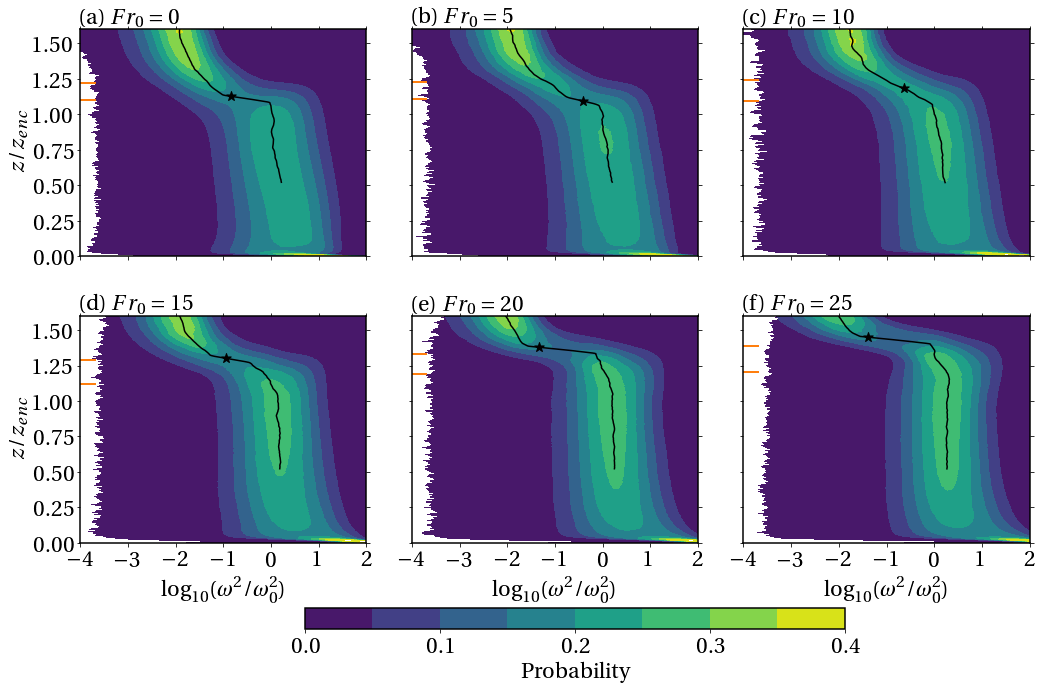

In [30]:
# Plot

f, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,sharex='all',sharey='all',figsize=(15,10))
ax1.tick_params(bottom=True,top=True,left=True,right=True)
ax2.tick_params(bottom=True,top=True,left=True,right=True)
ax3.tick_params(bottom=True,top=True,left=True,right=True)
ax4.tick_params(bottom=True,top=True,left=True,right=True)
ax5.tick_params(bottom=True,top=True,left=True,right=True)
ax6.tick_params(bottom=True,top=True,left=True,right=True)
ax1.set_xlim(-4,2) 
ax1.set_ylim(0,1.6)
ax1.set_xticks([-4,-3,-2,-1,0,1,2])
ax1.set_yticks([0,0.25,0.5,0.75,1,1.25,1.5])
cs1 = ax1.contourf(S0_vortpdf_x_mean,S0_vortpdf_y_mean,S0_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax1.plot(maxvort_avg_S0[0][1],maxvort_avg_S0[0][0],'k')
ax1.scatter(maxvort_avg_S0[0][1][j_saddle_S0],maxvort_avg_S0[0][0][j_saddle_S0],100,color='k',marker='*')
# ax1.scatter(maxvort_S0,S0.y/np.mean(S0.z_enc),5,color='k',marker='.')
# ax1.scatter((maxvort_S0[maxit_vort_S0+1]+maxvort_S0[maxit_vort_S0])/2,S0.y[maxit_vort_S0]/np.mean(S0.z_enc),100,color='k',marker='*')
ax1.axhline(np.mean(S0.z_ig/S0.z_enc),0,0.05,color='C1',linewidth=2)
ax1.axhline(np.mean(S0.z_if/S0.z_enc),0,0.05,color='C1',linewidth=2)
cs2 = ax2.contourf(S05_vortpdf_x_mean,S05_vortpdf_y_mean,S05_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax2.plot(maxvort_avg_S05[0][1],maxvort_avg_S05[0][0],'k')
ax2.scatter(maxvort_avg_S05[0][1][j_saddle_S05],maxvort_avg_S05[0][0][j_saddle_S05],100,color='k',marker='*')
# ax2.scatter(maxvort_S05,S05.y/np.mean(S05.z_enc),5,color='k',marker='.')
# ax2.scatter((maxvort_S05[maxit_vort_S05+1]+maxvort_S05[maxit_vort_S05])/2,S05.y[maxit_vort_S05]/np.mean(S05.z_enc),100,color='k',marker='*')
ax2.axhline(np.mean(S05.z_ig/S05.z_enc),0,0.05,color='C1',linewidth=2)
ax2.axhline(np.mean(S05.z_if/S05.z_enc),0,0.05,color='C1',linewidth=2)
cs3 = ax3.contourf(S10_vortpdf_x_mean,S10_vortpdf_y_mean,S10_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax3.plot(maxvort_avg_S10[0][1],maxvort_avg_S10[0][0],'k')
ax3.scatter(maxvort_avg_S10[0][1][j_saddle_S10],maxvort_avg_S10[0][0][j_saddle_S10],100,color='k',marker='*')
# ax3.scatter(maxvort_S10,S10.y/np.mean(S10.z_enc),5,color='k',marker='.')
# ax3.scatter((maxvort_S10[maxit_vort_S10+1]+maxvort_S10[maxit_vort_S10])/2,S10.y[maxit_vort_S10]/np.mean(S10.z_enc),100,color='k',marker='*')
ax3.axhline(np.mean(S10.z_ig/S10.z_enc),0,0.05,color='C1',linewidth=2)
ax3.axhline(np.mean(S10.z_if/S10.z_enc),0,0.05,color='C1',linewidth=2)
cs4 = ax4.contourf(S15_vortpdf_x_mean,S15_vortpdf_y_mean,S15_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax4.plot(maxvort_avg_S15[0][1],maxvort_avg_S15[0][0],'k')
ax4.scatter(maxvort_avg_S15[0][1][j_saddle_S15],maxvort_avg_S15[0][0][j_saddle_S15],100,color='k',marker='*')
# ax4.scatter(maxvort_S15,S15.y/np.mean(S15.z_enc),5,color='k',marker='.')
# ax4.scatter((maxvort_S15[maxit_vort_S15+1]+maxvort_S15[maxit_vort_S15])/2,S15.y[maxit_vort_S15]/np.mean(S15.z_enc),100,color='k',marker='*')
ax4.axhline(np.mean(S15.z_ig/S15.z_enc),0,0.05,color='C1',linewidth=2)
ax4.axhline(np.mean(S15.z_if/S15.z_enc),0,0.05,color='C1',linewidth=2)
cs5 = ax5.contourf(S20_vortpdf_x_mean,S20_vortpdf_y_mean,S20_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax5.plot(maxvort_avg_S20[0][1],maxvort_avg_S20[0][0],'k')
ax5.scatter(maxvort_avg_S20[0][1][j_saddle_S20],maxvort_avg_S20[0][0][j_saddle_S20],100,color='k',marker='*')
# ax5.scatter(maxvort_S20,S20.y/np.mean(S20.z_enc),5,color='k',marker='.')
# ax5.scatter((maxvort_S20[maxit_vort_S20+1]+maxvort_S20[maxit_vort_S20])/2,S20.y[maxit_vort_S20]/np.mean(S20.z_enc),100,color='k',marker='*')
ax5.axhline(np.mean(S20.z_ig/S20.z_enc),0,0.05,color='C1',linewidth=2)
ax5.axhline(np.mean(S20.z_if/S20.z_enc),0,0.05,color='C1',linewidth=2)
cs6 = ax6.contourf(S25_vortpdf_x_mean,S25_vortpdf_y_mean,S25_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax6.plot(maxvort_avg_S25[0][1],maxvort_avg_S25[0][0],'k')
ax6.scatter(maxvort_avg_S25[0][1][j_saddle_S25],maxvort_avg_S25[0][0][j_saddle_S25],100,color='k',marker='*')
# ax6.scatter(maxvort_S25,S25.y/np.mean(S25.z_enc),5,color='k',marker='.')
# ax6.scatter((maxvort_S25[maxit_vort_S25+1]+maxvort_S25[maxit_vort_S25])/2,S25.y[maxit_vort_S25]/np.mean(S25.z_enc),100,color='k',marker='*')
ax6.axhline(np.mean(S25.z_ig/S25.z_enc),0,0.05,color='C1',linewidth=2)
ax6.axhline(np.mean(S25.z_if/S25.z_enc),0,0.05,color='C1',linewidth=2)
ax1.set_ylabel(r'$z/z_{enc}$')
ax4.set_ylabel(r'$z/z_{enc}$')
ax4.set_xlabel(r'$\log_{10}(\omega^2/\omega_0^2)$')
ax5.set_xlabel(r'$\log_{10}(\omega^2/\omega_0^2)$')
ax6.set_xlabel(r'$\log_{10}(\omega^2/\omega_0^2)$')
ax1.set_title(r'(a) $Fr_0=0$',fontsize=24,loc='left')
ax2.set_title(r'(b) $Fr_0=5$',fontsize=24,loc='left')
ax3.set_title(r'(c) $Fr_0=10$',fontsize=24,loc='left')
ax4.set_title(r'(d) $Fr_0=15$',fontsize=24,loc='left')
ax5.set_title(r'(e) $Fr_0=20$',fontsize=24,loc='left')
ax6.set_title(r'(f) $Fr_0=25$',fontsize=24,loc='left')
cbar_ax = f.add_axes([0.3,0.1,0.5,0.03])
cbar = f.colorbar(cs1,cax=cbar_ax,ticks=[0,0.1,0.2,0.3,0.4],orientation='horizontal')
cbar.set_label('Probability')
plt.tight_layout(rect=[0,0.1,1,1],h_pad=1)
plt.savefig(opath+'pdfs_maxgrad_dy005_samplesizeylen.pdf',bbox_inches='tight')
plt.show()


83